In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model,model_selection

In [2]:
df =pd.read_csv("HR_comma_sep.csv")

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


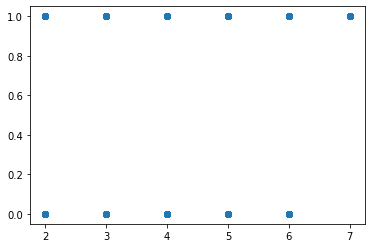

In [3]:
plt.scatter(df["number_project"],df["left"])

In [4]:
dummy = pd.get_dummies(df["Department"],df["salary"])
dummy

,"0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_IT","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_RandD","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_accounting","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_hr","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_management","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_marketing","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_product_mng","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_sales","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_support","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_technical"
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [5]:
df = pd.concat([df,dummy],axis='columns')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,"0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_IT","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_RandD","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_accounting","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_hr","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_management","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_marketing","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_product_mng","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_sales","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_support","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_technical"
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0


In [6]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(df.drop(['Department','salary','satisfaction_level','last_evaluation'],axis='columns'),df["left"],test_size=0.9)

In [15]:
reg = linear_model.LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\panka\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [16]:
reg.predict(x_test)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [9]:
y_test

4289     0
4116     0
14591    1
3459     0
6760     0
        ..
7951     0
10947    0
12290    1
1190     1
12997    0
Name: left, Length: 13500, dtype: int64

In [20]:
reg.score(x_test,y_test)

1.0

In [11]:
reg.predict_proba(x_test)

array([[0.9903871 , 0.0096129 ],
       [0.99562311, 0.00437689],
       [0.02296253, 0.97703747],
       ...,
       [0.02646767, 0.97353233],
       [0.03224262, 0.96775738],
       [0.99293485, 0.00706515]])

In [12]:
y_train

5363     0
1700     1
14251    1
11167    0
9928     0
        ..
8519     0
10283    0
7750     0
5837     0
1591     1
Name: left, Length: 1499, dtype: int64

In [13]:
x_train

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,"0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_IT","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_RandD","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_accounting","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_hr","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_management","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_marketing","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_product_mng","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_sales","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_support","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_technical"
5363,5,103,6,0,0,0,0,0,0,0,0,0,0,1,0,0
1700,2,132,3,0,1,0,0,0,0,0,0,0,0,1,0,0
14251,5,269,5,0,1,0,0,0,0,0,0,0,0,0,0,1
11167,3,194,3,0,0,0,0,0,0,0,0,0,1,0,0,0
9928,3,206,3,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,4,157,2,0,0,0,0,0,0,0,0,0,0,0,0,1
10283,3,257,2,0,0,0,0,0,0,0,0,0,0,0,1,0
7750,4,198,3,1,0,0,0,0,0,0,0,0,0,0,0,1
5837,4,173,4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
x_test

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,"0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_IT","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_RandD","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_accounting","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_hr","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_management","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_marketing","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_product_mng","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_sales","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_support","0 low\n1 medium\n2 medium\n3 low\n4 low\n ... \n14994 low\n14995 low\n14996 low\n14997 low\n14998 low\nName: salary, Length: 14999, dtype: object_technical"
4289,3,188,4,0,0,0,0,0,0,0,0,0,0,1,0,0
4116,4,232,3,1,0,0,0,1,0,0,0,0,0,0,0,0
14591,2,156,3,0,1,0,0,0,0,1,0,0,0,0,0,0
3459,5,212,6,0,0,0,0,0,0,0,0,0,0,1,0,0
6760,5,278,2,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,4,251,3,0,0,0,0,0,0,0,0,0,0,1,0,0
10947,3,196,3,0,0,0,0,0,0,1,0,0,0,0,0,0
12290,2,128,3,0,1,0,0,0,0,0,1,0,0,0,0,0
1190,6,264,4,0,1,0,0,0,0,0,0,0,0,0,1,0
